In [18]:
import sys
#print(sys.path)
#sys.path.append('/Users/takumi/opt/anaconda3/envs/qc/lib/python3.9/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas
import tensorflow as tf
from keras.layers import *
#from keras.optimizers import *

#dir(tf.keras.layers)
#dir(tf.keras.optimizers)

In [21]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (60000, 28, 28)
y_train :  (60000,)
X_test :  (10000, 28, 28)
y_test :  (10000,)


In [12]:
def y_initialize(y_data):
        y=[]
        for _ in range(len(y_data)):
            now=np.zeros(10)
            now[y_data[_]]=1.0
            y.append(now)

        return np.array(y)

In [13]:
#y_train = y_initialize(y_train)
#y_test = y_initialize(y_test)

y_train (i=1):  0
X_train (i=1): 


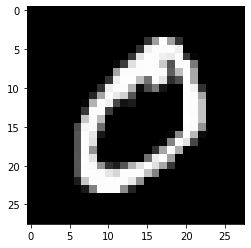

y_train (i=10):  3
X_train (i=10): 


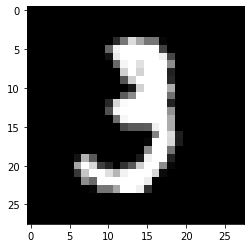

y_train (i=100):  5
X_train (i=100): 


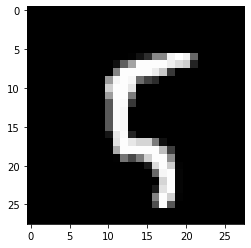

In [22]:
for i in [1,10,100]:
    print("y_train", "(i="+str(i)+"): ", y_train[i])
    print("X_train", "(i="+str(i)+"): ")    
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

In [23]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10,input_dim=256))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#model.compile(optimizer=opt,
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

/Users/takumi/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [99]:
#callbacks = []
#callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

In [24]:

history = model.fit(X_train, y_train, 
                    batch_size=100, 
                    epochs=1000,
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/1000
600/600 [==============================] - 1s 2ms/step - loss: 1.0088 - accuracy: 0.7732 - val_loss: 0.5368 - val_accuracy: 0.8758
Epoch 2/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.4765 - accuracy: 0.8778 - val_loss: 0.4004 - val_accuracy: 0.8967
Epoch 3/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.3922 - accuracy: 0.8946 - val_loss: 0.3516 - val_accuracy: 0.9049
Epoch 4/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.3527 - accuracy: 0.9028 - val_loss: 0.3240 - val_accuracy: 0.9114
Epoch 5/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.3278 - accuracy: 0.9089 - val_loss: 0.3039 - val_accuracy: 0.9147
Epoch 6/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.3093 - accuracy: 0.9137 - val_loss: 0.2893 - val_accuracy: 0.9198
Epoch 7/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.2945 - accuracy: 0.9174 - val_loss: 0.2772 - val_accuracy:

60000/60000 [==============================] - 49s 807us/step - loss: 0.0024 - accuracy: 1.0000
loss(train): 0.002398
accuracy(train): 1.0

10000/10000 [==============================] - 8s 800us/step - loss: 0.0706 - accuracy: 0.9808
loss(test): 0.07064
accuracy(test): 0.9808


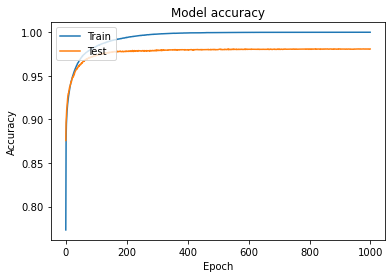

In [25]:
train_loss, train_acc = model.evaluate(X_train, y_train,batch_size=1, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))

print()

test_loss, test_acc = model.evaluate(X_test, y_test,batch_size=1,verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


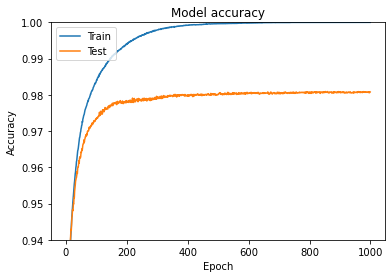

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.94,1.0)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
